In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the file:
df = pd.read_excel(r'D:\Company Assingments\Shack Labs\DS - Assignment Part 1 data set.xlsx')
df.head()

,Transaction date,House Age,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,Number of bedrooms,House size (sqft),House price of unit area
0,2012.916667,32.0,84.87882,10,24.98298,121.54024,1,575,37.9
1,2012.916667,19.5,306.59470,9,24.98034,121.53951,2,1240,42.2
2,2013.583333,13.3,561.98450,5,24.98746,121.54391,3,1060,47.3
3,2013.500000,13.3,561.98450,5,24.98746,121.54391,2,875,54.8
4,2012.833333,5.0,390.56840,5,24.97937,121.54245,1,491,43.1


In [3]:
# checking the number of rows and columns:
df.shape

(414, 9)

In [4]:
# checking for duplicate values in the dataframe:
df.duplicated().sum()

0

In [5]:
# checking and verfying the datatypes of the columns:
df.dtypes

Transaction date                            float64
House Age                                   float64
Distance from nearest Metro station (km)    float64
Number of convenience stores                  int64
latitude                                    float64
longitude                                   float64
Number of bedrooms                            int64
House size (sqft)                             int64
House price of unit area                    float64
dtype: object

In [6]:
# checking for null values in the dataset:
df.isnull().sum()

Transaction date                            0
House Age                                   0
Distance from nearest Metro station (km)    0
Number of convenience stores                0
latitude                                    0
longitude                                   0
Number of bedrooms                          0
House size (sqft)                           0
House price of unit area                    0
dtype: int64

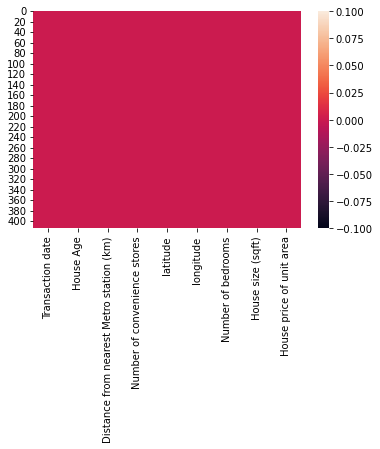

In [7]:
# Visualising the null values with the help of heatmap:
sns.heatmap(df.isnull())
plt.show()

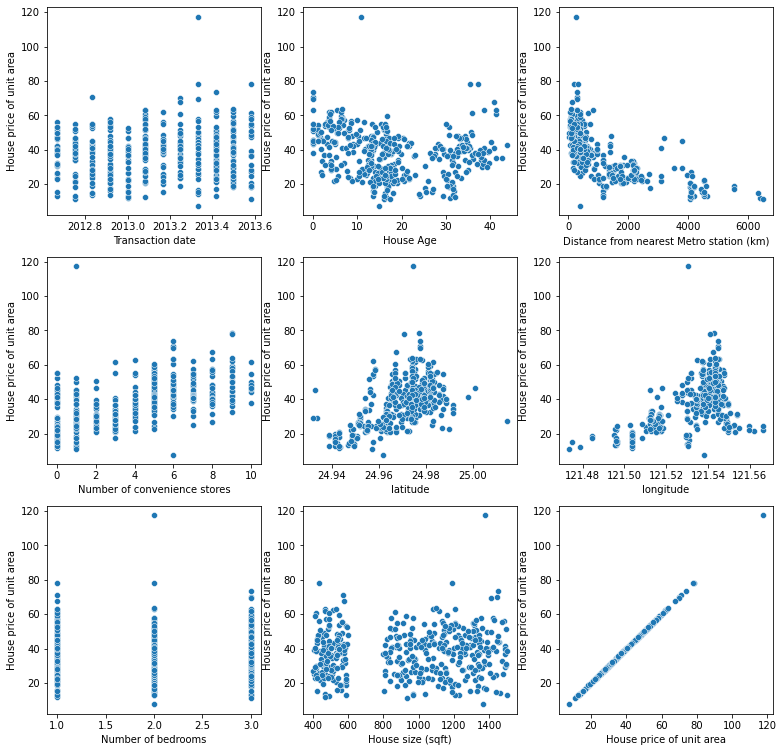

In [8]:
# Checking the correlation with scatterplot :
Y = df['House price of unit area']
plt.figure(figsize=(13,13))
for i,col in enumerate(df.columns):
    plt.subplot(3,3,i+1)
    sns.scatterplot(df[col],Y)
plt.show()    

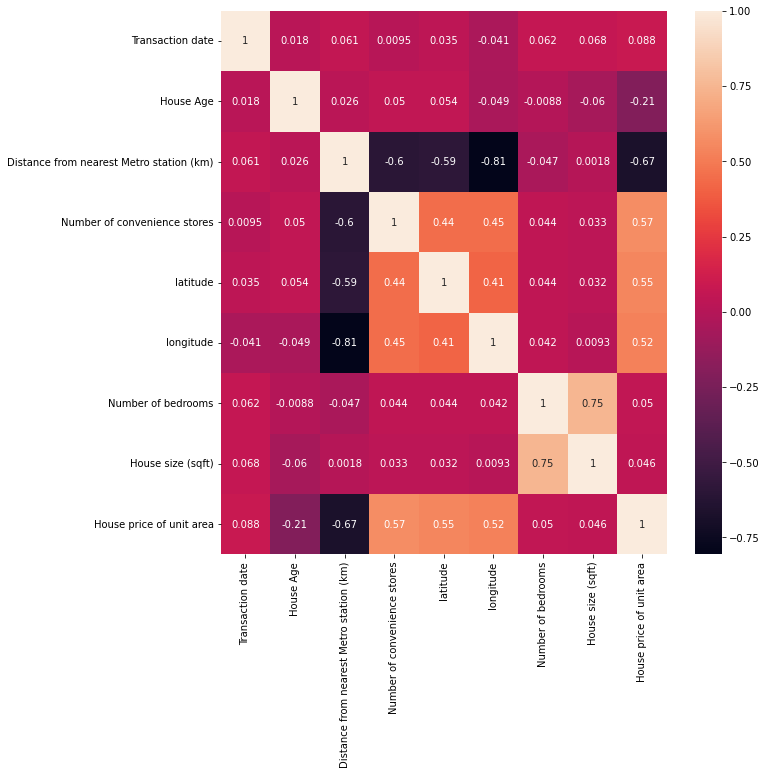

In [9]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot = True)
plt.show()

In [10]:
# As we can see the correlation of Transcation Date, Housing age , Number of houses and House size is between -0.5 and 0.5
# So we drop that columns and they don't have a very good correlation with the output:
df.drop(['Transaction date','House Age','Number of bedrooms','House size (sqft)'],axis = 1,inplace = True)


In [11]:
df.head()

,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude,House price of unit area
0,84.87882,10,24.98298,121.54024,37.9
1,306.59470,9,24.98034,121.53951,42.2
2,561.98450,5,24.98746,121.54391,47.3
3,561.98450,5,24.98746,121.54391,54.8
4,390.56840,5,24.97937,121.54245,43.1


In [12]:
# sns.boxplot(data = df , x = 'House price of unit area')
# plt.show()

In [13]:
# Sperating the input and output:
X = df.drop('House price of unit area', axis = 1)
Y = df['House price of unit area']

In [14]:
X.head()

,Distance from nearest Metro station (km),Number of convenience stores,latitude,longitude
0,84.87882,10,24.98298,121.54024
1,306.59470,9,24.98034,121.53951
2,561.98450,5,24.98746,121.54391
3,561.98450,5,24.98746,121.54391
4,390.56840,5,24.97937,121.54245


In [15]:
# Importing train test split and standard scaler:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# importing the linearregression class
from sklearn.linear_model import LinearRegression

# importing libraries required to check the accuracy:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [16]:
# Changing the random_state to find at which random state we get the highest accuracy:

lst = []
for i in range(1000):
    # Seperating 70% training data and 30% testing data:
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = .3, random_state= i)
    ss = StandardScaler()
    X_train = ss.fit_transform(X_train)
    X_test = ss.transform(X_test)
    # making the object of linear regression:
    lr = LinearRegression()   
    lr.fit(X_train,Y_train)
    Y_pred = lr.predict(X_test)
    score=r2_score(Y_test,Y_pred)   
    lst.append(score)
rs = (lst.index(max(lst)))
rs

142

In [17]:
# Seperating 70% training data and 30% testing data:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = .3, random_state= rs)

In [18]:
# # Scaling the input data:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

### Making the linear regression model:


In [19]:
# importing the linearregression class
from sklearn.linear_model import LinearRegression

In [20]:
# making the object of linear regression:
lr = LinearRegression()

In [21]:
# Training the model with 70% of data with fit method of LinearRegression:
lr.fit(X_train,Y_train)

LinearRegression()

In [22]:
# Testing the data with 30% testing data:
Y_pred = lr.predict(X_test)

In [23]:
# Evaluating the model
# Getting the mean square error
from sklearn.metrics import mean_squared_error
mean_squared_error(Y_test,Y_pred)

52.97705357613552

In [24]:
# Checking the accuracy with r2_score
r2_score(Y_test,Y_pred)

0.6684998395947108

### Checking the assumptions:

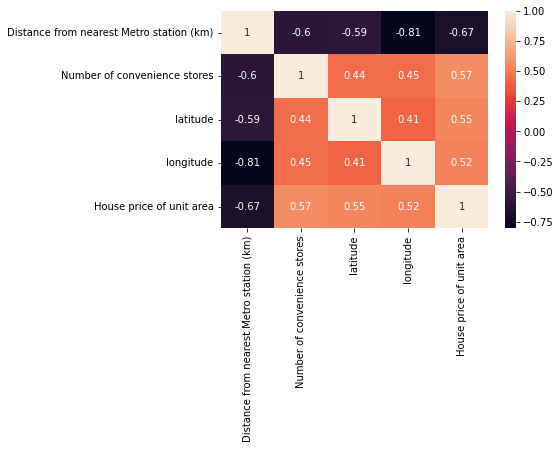

In [25]:
# 1) Checking multi-colinearity:
sns.heatmap(df.corr(),annot = True)
plt.show()

In [26]:
# There is highest intercorrelation between No. of stores and longitude 
# No. of stores have higher correlation with the output so we keep it and drop longitude.
df.drop('longitude',axis = 1 , inplace = True)

In [27]:
# Now the input changes:
X = df.drop('House price of unit area',axis =1)
Y = df['House price of unit area']

In [28]:
# Dividing the data into training and testing data:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=.3,random_state = rs)

In [29]:
# Applying scaling to the input data:
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [30]:
lr.fit(X_train,Y_train)

LinearRegression()

In [31]:
# Predicting the ouput of the testing data:
Y_pred = lr.predict(X_test)

In [32]:
# Getting the mean square error and arrcuracy
error= mean_squared_error(Y_test,Y_pred)
print('Error is: ',error)
accuracy = r2_score(Y_test,Y_pred)
print("Accuracy is :",accuracy)

Error is:  52.98061646505232
Accuracy is : 0.6684775450696722


In [33]:
lr.coef_

array([-5.57455317,  3.1470907 ,  2.62679763])

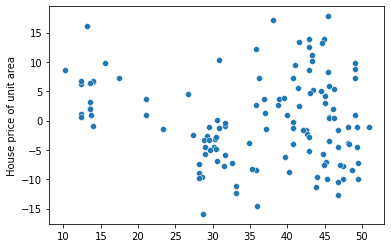

In [34]:
# checking for linear relation ship between Y_pred and residual:
residual = Y_test - Y_pred
sns.scatterplot(Y_pred, residual)
plt.show()

In [35]:
# As our linear relationship assumption is not fullfilled we will not check homoskedastick assumstion
# We move to our last assumption i.e. residual should be normally distributed.

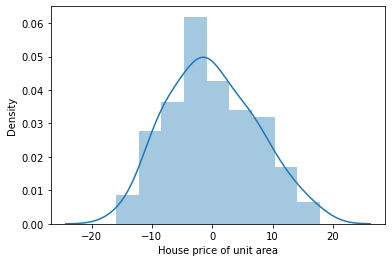

In [36]:
# Checking if the residual data is normally distributed:
sns.distplot(residual)
plt.show()

In [37]:
residual.skew()

0.26292199830189017

 The residual data is moderately skewed
 

The relation between residual and Y_pred is linear but heteroskedastic and residual data is skewed so only 2 assumptions are satisfied.

Therefore we more to polynomial linear regression

In [38]:
# Importing the polynomial features class:
from sklearn.preprocessing import PolynomialFeatures
    
# Making the object of class
pf = PolynomialFeatures(2)

# Changing the input to polynomial with degree 2:
X_poly = pf.fit_transform(X)
    
# Dividing the data into training set and testing set with the help of train_test_split:
X_train1,X_test1,Y_train1,Y_test1 = train_test_split(X_poly,Y,test_size = .3,random_state=rs)
    
# # Scaling the input data:
ss = StandardScaler()
X_train1 = ss.fit_transform(X_train1)
X_test1 = ss.transform(X_test1)
    
# Making object of the class linear regression:
lr = LinearRegression()
    
# Training the model with training data:
lr.fit(X_train1,Y_train1)
    
Y_pred1 = lr.predict(X_test1)
        
accurracy = r2_score(Y_test1,Y_pred1)
print('Accuracy is: ',accurracy)
    
mse = mean_squared_error(Y_test1,Y_pred1)
print('Mean Square error: ',mse)
    
print('Training score: ',lr.score(X_train1,Y_train1))
    
    

Accuracy is:  0.776214699462785
Mean Square error:  35.763137615430466
Training score:  0.5483841883283977


In [39]:
# Importing the polynomial features class:
from sklearn.preprocessing import PolynomialFeatures

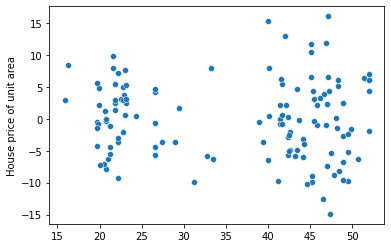

In [40]:
# checking for linear relation ship between Y_pred and residual:
residual = Y_test1 - Y_pred1
sns.scatterplot(Y_pred1, residual)
plt.show()

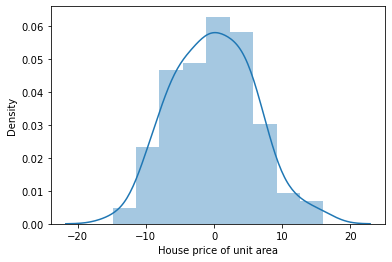

Skewness is:  0.1610967173665486


In [41]:
# Checking if the residual data is normally distributed:
sns.distplot(residual)
plt.show()
print("Skewness is: ",residual.skew())

##### As we can see that there is linear heteroskedastic relationship between y_pred and residual  and data has less skewness so we our 3 assumptions are statisfied so it's a good model but we move to check cubic polynomial linear regression.

In [42]:
# Making the object of class
pf = PolynomialFeatures(3)

# Changing the input to polynomial with degree 2:
X_poly = pf.fit_transform(X)
    
# Dividing the data into training set and testing set with the help of train_test_split:
X_train1,X_test1,Y_train1,Y_test1 = train_test_split(X_poly,Y,test_size = .3,random_state=rs)
    
# # Scaling the input data:
ss = StandardScaler()
X_train1 = ss.fit_transform(X_train1)
X_test1 = ss.transform(X_test1)
    
# Making object of the class linear regression:
lr = LinearRegression()
    
# Training the model with training data:
lr.fit(X_train1,Y_train1)
    
Y_pred1 = lr.predict(X_test1)
        
accurracy = r2_score(Y_test1,Y_pred1)
print('Accuracy is: ',accurracy)
    
mse = mean_squared_error(Y_test1,Y_pred1)
print('Mean Square error: ',mse)
    
    
    

Accuracy is:  0.7983382494526099
Mean Square error:  32.22757222785316


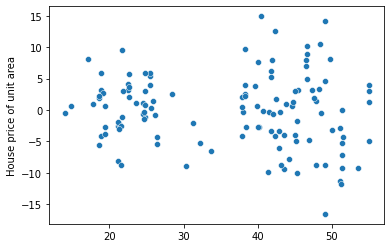

In [43]:
# checking for linear relation ship between Y_pred and residual:
residual = Y_test1 - Y_pred1
sns.scatterplot(Y_pred1, residual)
plt.show()

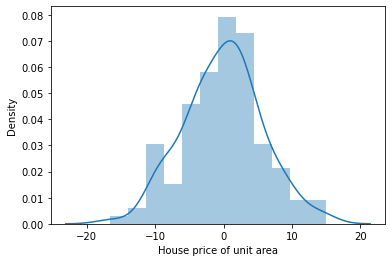

Skewness is:  -0.006374433167625074


In [44]:
# Checking if the residual data is normally distributed:
sns.distplot(residual)
plt.show()
print("Skewness is: ",residual.skew())

### Here in the cubic polynomial model multicolinearity , skewness and heteroskedastick linear relation assumpstions are satisfied so this is a very good model with 79% accuracy.

##### Now as training score is greater than testing score and there is no change in the accuracy after changing data to cubic polynomial so we move to Lasso and Ridge Regularisation methods.

### LASSO REGULARISATION:

In [45]:
# Now the input changes:
X = df.drop('House price of unit area',axis =1)
Y = df['House price of unit area']

# Dividing the data into training and testing data:
X_train2,X_test2,Y_train2,Y_test2 = train_test_split(X,Y,test_size=.3,random_state = rs)

# Applying scaling to the input data:
X_train2 = ss.fit_transform(X_train2)
X_test2 = ss.transform(X_test2)


In [46]:
# using lasso technique of regularisation:
from sklearn.linear_model import Lasso
for i in range(200,1001,50):

    l1 = Lasso(i,random_state=rs) # i here is the hyperparameter
    l1.fit(X_train2,Y_train2)
    print("Value of lambda  ",i)
    print("Training score :",l1.score(X_train2,Y_train2))
    
    Y_pred2 = l1.predict(X_test2)
    #after train model ,check testingscore
    print("Testing score :",r2_score(Y_test2,Y_pred2))
    print('--------------------------------------------------')

Value of lambda   200
Training score : 0.0
Testing score : -0.0500269760510752
--------------------------------------------------
Value of lambda   250
Training score : 0.0
Testing score : -0.0500269760510752
--------------------------------------------------
Value of lambda   300
Training score : 0.0
Testing score : -0.0500269760510752
--------------------------------------------------
Value of lambda   350
Training score : 0.0
Testing score : -0.0500269760510752
--------------------------------------------------
Value of lambda   400
Training score : 0.0
Testing score : -0.0500269760510752
--------------------------------------------------
Value of lambda   450
Training score : 0.0
Testing score : -0.0500269760510752
--------------------------------------------------
Value of lambda   500
Training score : 0.0
Testing score : -0.0500269760510752
--------------------------------------------------
Value of lambda   550
Training score : 0.0
Testing score : -0.0500269760510752
-----------

In [47]:
print('Slopes of input are: ',l1.coef_)

Slopes of input are:  [-0.  0.  0.]


### As Lasso is making all our slopes zero so we don't consider this for cross checking accuracy:

### RIDGE REGULARISATION:

In [48]:
# # Call inbuilt class Ridge:
# from sklearn.linear_model import Ridge

# # Choose the right values of lambda(alpha) in ridge regularisation when adding external error during trainig time:

# for i in range(0,51,1): # start = 0 ; stop = 50 ; step = +1 
    
#     # create object of Ridge regularisation class
#     L2 = Ridge(i,random_state = rs) #first i = 0 , next = 1 and so on till 50
    
#     # Train the model with 70% of data with the help of ridge use inbuilt method fit() of Ridge class
#     L2.fit(X_train2 , Y_train2)
    
#     # Checking training score after training the model with the ridge:
#     s1 = L2.score(X_train2 , Y_train2)
    
#     # Checking the test score after trainign the model with the ridge:
#     s2 = L2.score(X_test2 , Y_test2)
#     print("Value of lambda :",i)
#     print("Training Score :", s1)
#     print("Testing Score :", s2)
#     print("-------------------------")

### From the above code I found that the Ridge Regularisation is less overfitted at hyperparameter = 37

In [50]:
# Call inbuilt class Ridge:
from sklearn.linear_model import Ridge

# create object of Ridge regularisation class
L2 = Ridge(37,random_state = rs) 
    
# Train the model with 70% of data with the help of ridge use inbuilt method fit() of Ridge class
L2.fit(X_train2 , Y_train2)
    
# Checking training score after training the model with the ridge:
s1 = L2.score(X_train2 , Y_train2)
    
# Checking the test score after trainign the model with the ridge:
s2 = L2.score(X_test2 , Y_test2)
print("Value of lambda :",37)
print("Training Score :", s1)
print("Testing Score :", s2)


Value of lambda : 37
Training Score : 0.45979181017897797
Testing Score : 0.6718248155397499


## SUMMARY:

#### NOTE: 
1) Models used here are

                    a) Linear regression.

                    b) Polynomial linear regression degree 2 and 3.
                        
                    c) Lasso and Rigde regularisation. (to check the overfitting)
                        
2) Assumptions used to verify the model:
                  
                  a) Monocolinearity

                  b) Linear relation between inputs and output(Trick check residual of inputs relationship with output)
                                       
                  c) Linear relation should be homoskedastick and not heteroskedastick
                                       
                  d) Residual should have no skewness

## ANALYSIS:

1) Accuracy with Linear Regression was around 66% but 3 out of 4 assumptions mentioned above were not satisfied so we we rejected the model

2) We used Polynomial Regression model with degree 3 and it satisfied all the assumptions with a much better accuracy score of 79.8%.

But we found that the model of overfit and to reduce the overfitting we moved to Lasso and Ridge regularisation.

3) Here we found that Lasso made all the slopes of input zero so we could not use that model to reduce the overfitting and hence we moved to Ridge regularisation.

4) After applying Ridge regularisation we found that the accuracy got reduced to 67% but we saw that the difference between training and testing score reduced thus reducing the overfitting.